In [224]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
%matplotlib inline

In [11]:
cur_path = os.getcwd()

In [12]:
cur_path

'C:\\Users\\Machine\\Norbit\\Logistic Regression titanic HW'

In [17]:
!unzip 'titanic.zip' -d .

Archive:  titanic.zip
  inflating: ./gender_submission.csv  
  inflating: ./test.csv              
  inflating: ./train.csv             


In [18]:
%ls

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 5CB0-8B8D

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\Machine\Norbit\Logistic Regression titanic HW

28.06.2022  18:55    <DIR>          .
28.06.2022  18:43    <DIR>          ..
28.06.2022  18:44    <DIR>          .ipynb_checkpoints
11.12.2019  02:17             3я258 gender_submission.csv
11.12.2019  02:17            28я629 test.csv
28.06.2022  18:49            34я877 titanic.zip
11.12.2019  02:17            61я194 train.csv
28.06.2022  18:54             3я382 Untitled.ipynb
               5 д ©«®ў        131я340 Ў ©в
               3 Ї Ї®Є  206я195я163я136 Ў ©в бў®Ў®¤­®


In [67]:
test = pd.read_csv('test.csv')

In [137]:
train = pd.read_csv('train.csv')

In [68]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,3,1,35.0,0,0,373450,8.0500,NaN,S


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [29]:
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [72]:
y_train = train['Survived'].to_numpy()

In [73]:
train.Name.to_numpy()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [138]:
train.drop(['Name'], axis = 1, inplace = True)

In [101]:
train.drop(['Survived'], axis = 1, inplace = True)

In [151]:
test.drop(['Name'], axis = 1, inplace = True)

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [103]:
train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [139]:
train.Sex = train.Sex.apply(lambda s: 1 if s == 'male' else 0 )

In [140]:
train.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [141]:
train.Age.fillna(train.Age.median(), inplace = True)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [111]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [113]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [115]:
train.Ticket.nunique()

681

In [143]:
train.drop(['Ticket'], axis = 1, inplace = True)

In [144]:
train.drop(['Cabin'], axis = 1, inplace = True)

In [148]:
test.drop(['Cabin'], axis = 1, inplace = True)

In [149]:
test.drop(['Ticket'], axis = 1, inplace = True)

In [125]:
train.Embarked.nunique()

3

In [145]:
le = LabelEncoder()

In [146]:
train.Embarked = le.fit_transform(train.Embarked)

In [160]:
test.Embarked = le.fit_transform(test.Embarked)

In [147]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.163517
Name: Survived, dtype: float64

### Видно, что фичи  Parch, Sibsp, Age мало коррелируют с Survived, поэтому будут удалены

In [155]:
train.drop(['Parch', 'SibSp', 'Age', '' ], axis = 1, inplace = True)

In [156]:
test.drop(['Parch', 'SibSp', 'Age' ], axis = 1, inplace = True)

In [190]:
train.drop(['PassengerId'], axis = 1, inplace = True)

In [191]:
test.drop(['PassengerId'], axis = 1, inplace = True)

In [192]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2


In [193]:
test.head()

,Pclass,Sex,Fare,Embarked
0,3,male,7.8292,1
1,3,female,7.0000,2
2,2,male,9.6875,1
3,3,male,8.6625,2
4,3,female,12.2875,2


In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 38.4 KB


In [188]:
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [229]:
y_train = train['Survived']

In [201]:
X_train = train[['Pclass', 'Sex', 'Fare', 'Embarked']]

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 31.4 KB


In [202]:
scaler = StandardScaler().fit(X_train)

In [203]:
X_train_scaled = scaler.transform(X_train)

In [204]:
X_train.shape, y_train.shape

((891, 4), (891,))

### Разделение X_train на train и test, сравнение показателей scaled и noscaled

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [206]:
from sklearn.linear_model import LogisticRegression

In [209]:
cls_noscaled = LogisticRegression()

In [210]:
cls_noscaled.fit(X_train, y_train)

LogisticRegression()

In [211]:
y_noscaled_pred = cls_noscaled.predict(X_test)

In [220]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [213]:
accuracy_score(y_test, y_noscaled_pred)

0.7649253731343284

In [215]:
f1_score(y_test, y_noscaled_pred)

0.7248908296943231

In [216]:
precision_score(y_test, y_noscaled_pred)

0.7033898305084746

In [217]:
recall_score(y_test, y_noscaled_pred)

0.7477477477477478

In [219]:
confusion_matrix(y_test, y_noscaled_pred)

array([[122,  35],
       [ 28,  83]], dtype=int64)

In [221]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_noscaled_pred), display_labels=cls_noscaled.classes_)

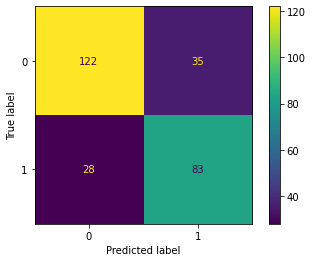

In [226]:
disp.plot()
plt.show()

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [232]:
cls = LogisticRegression()
cls.fit(X_train, y_train)

LogisticRegression()

In [234]:
preds = cls.predict(X_test)

In [235]:
accuracy_score(preds, y_test)

0.7649253731343284

In [236]:
f1_score(preds, y_test)

0.7248908296943231

In [237]:
precision_score(preds, y_test)

0.7477477477477478

In [238]:
recall_score(preds, y_test)

0.7033898305084746

In [239]:
recall_score(preds, y_test)

0.7033898305084746

In [240]:
confusion_matrix(preds, y_test)

array([[122,  28],
       [ 35,  83]], dtype=int64)

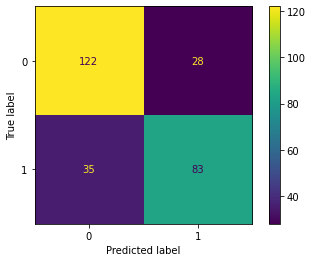

In [241]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(preds, y_test), display_labels=cls.classes_)
disp.plot()
plt.show()

### В данном случае никакой разницы

## Метрики на тестовой выборке:

In [245]:
test.head()

,Pclass,Sex,Fare,Embarked
0,3,male,7.8292,1
1,3,female,7.0000,2
2,2,male,9.6875,1
3,3,male,8.6625,2
4,3,female,12.2875,2


In [246]:
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [258]:
test.head()

,Pclass,Sex,Fare,Embarked
0,3,1,7.8292,1
1,3,0,7.0000,2
2,2,1,9.6875,1
3,3,1,8.6625,2
4,3,0,12.2875,2


In [259]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Fare      417 non-null    float64
 3   Embarked  418 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 11.6 KB


In [260]:
test.Fare.fillna(test.Fare.median(), inplace = True)

In [261]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 11.6 KB


In [262]:
X = test

In [266]:
y = pd.read_csv('gender_submission.csv')

In [270]:
y.drop(['PassengerId'], axis = 1, inplace = True)

In [272]:
X.shape, y.shape

((418, 4), (418, 1))

In [273]:
scaler.fit(X)

StandardScaler()

In [274]:
X_scaled = scaler.transform(X)

In [275]:
preds = cls.predict(X_scaled)

In [276]:
print(f'accuracy_score: {accuracy_score(preds,y)}, f1 score: {f1_score(preds, y)}, precision score: {precision_score(preds,y)},\
recall: {recall_score(preds, y)}')

accuracy_score: 0.9736842105263158, f1 score: 0.9650793650793651, precision score: 1.0,recall: 0.9325153374233128


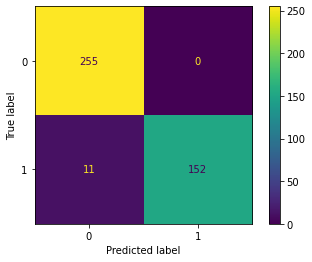

In [277]:
confusion_matrix(preds, y)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(preds, y), display_labels=cls.classes_)
disp.plot()
plt.show()